In [158]:
import pandas as pd
from pymongo import MongoClient
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import timedelta,datetime,timezone
from dateutil import tz



client = MongoClient('mongodb://localhost:27017/')
db = client['tweet_db']
data=db.tweet_collection
col=data.find_one()
col

{'_id': ObjectId('623beb360a01b7d23a907f09'),
 'created_at': 'Thu Mar 24 03:53:27 +0000 2022',
 'id': 1506841597803171845,
 'id_str': '1506841597803171845',
 'text': 'RT @bamitav: The Costliest Types of Cyber Crime!\n\nhttps://t.co/iXdwKlPtfW\n\n#cyberwar #cybercrime #cyber #hacker #privacy #APT #bot #CISO #S…',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'cyberwar', 'indices': [75, 84]},
   {'text': 'cybercrime', 'indices': [85, 96]},
   {'text': 'cyber', 'indices': [97, 103]},
   {'text': 'hacker', 'indices': [104, 111]},
   {'text': 'privacy', 'indices': [112, 120]},
   {'text': 'APT', 'indices': [121, 125]},
   {'text': 'bot', 'indices': [126, 130]},
   {'text': 'CISO', 'indices': [131, 136]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'bamitav',
    'name': '𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖',
    'id': 91608548,
    'id_str': '91608548',
    'indices': [3, 11]}],
  'urls': [{'url': 'https://t.co/iXdwKlPtfW',
    'expanded_url': 'https://www.statista.com/chart/27097/mos

In [159]:
dff=[]
for tweet in range(len(col)):
    d={ 'created_at':col['created_at'],
        'id':col['user']['id'],
       'name':col['user']['name'],
       'location':col['user']['location'],
        'lang':col['lang'],
       'text':col['entities']['hashtags'][0]['text'],
      'retweet_count':col['retweet_count'],
       'favorite_count':col['favorite_count'],
       'favorited':col['favorited'],
       'retweeted':col['retweeted'],
       'possibly_sensitive':col['possibly_sensitive'],
      'tweet_text':col['text']}
    dff.append(d)
    
    

In [160]:
#df = pd.DataFrame(list(db.tweet_collection.find()))


In [161]:
df = pd.DataFrame(dff)
df

,created_at,id,name,location,lang,text,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,tweet_text
0,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
1,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
2,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
3,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
4,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
5,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
6,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
7,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
8,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...
9,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,False,False,False,RT @bamitav: The Costliest Types of Cyber Crim...


In [162]:
#df['created_at'] = pd.to_datetime(df['created_at']).dt.date
#df['created_Day'] = pd.to_datetime(df['created_at']).dt.day
#df['created_Year'] = pd.to_datetime(df['created_at']).dt.year
#df['created_Month'] = pd.to_datetime(df['created_at']).dt.month

#df['created_Week_Day'] = pd.to_datetime(df['created_at']).dt.day_name()
#df['created_Month_Years'] = pd.to_datetime(df['created_at']).dt.month_name()


In [163]:
#import pytz
#test_Ind=datetime.now().astimezone().strftime("%Y-%m-%d")
#testAus=datetime.now(pytz.timezone("Australia/Sydney")).strftime("%Y-%m-%d")
#test_us=datetime.now(pytz.timezone("US/Eastern")).strftime("%Y-%m-%d")


In [164]:
#df['created_at'] = pd.to_datetime(df['created_at']).dt.date


In [165]:
df.isna().sum()

created_at            0
id                    0
name                  0
location              0
lang                  0
text                  0
retweet_count         0
favorite_count        0
favorited             0
retweeted             0
possibly_sensitive    0
tweet_text            0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          27 non-null     object
 1   id                  27 non-null     int64 
 2   name                27 non-null     object
 3   location            27 non-null     object
 4   lang                27 non-null     object
 5   text                27 non-null     object
 6   retweet_count       27 non-null     int64 
 7   favorite_count      27 non-null     int64 
 8   favorited           27 non-null     bool  
 9   retweeted           27 non-null     bool  
 10  possibly_sensitive  27 non-null     bool  
 11  tweet_text          27 non-null     object
dtypes: bool(3), int64(3), object(6)
memory usage: 2.1+ KB


In [167]:
#df['favorited'] = df['favorited'].replace({True: 1, False: 0})

#df['retweeted'] = df['retweeted'].replace({True: 1, False: 0})
#df['possibly_sensitive'] = df['possibly_sensitive'].replace({True: 1, False: 0})
#df['favorited'] = df['favorited'].map({True: 1, False: 0})


In [168]:
df.replace({False: 0, True: 1}, inplace=True) # change false and true using 0 and 1


In [169]:
df

,created_at,id,name,location,lang,text,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,tweet_text
0,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
1,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
2,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
3,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
4,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
5,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
6,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
7,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
8,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...
9,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,RT @bamitav: The Costliest Types of Cyber Crim...


In [170]:
text=df['tweet_text']  

def cleanText(text):
    text=re.sub('@[A-Za-z0-9]+','',text) #remove @ mention
    text=re.sub('#','',text) # remove # symbol
    text=re.sub('RT[\s]+','',text) #remove RT 
    text=re.sub(':','',text)
    text=re.sub('!\n\n','',text)
    text=re.sub('\n\n','',text)
    text=re.sub(r'https?:\/\/\S+','',text) #remove hyperlink
    return text
df['tweet_text']=df['tweet_text'].apply(cleanText)
df   

,created_at,id,name,location,lang,text,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,tweet_text
0,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
1,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
2,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
3,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
4,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
5,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
6,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
7,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
8,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...
9,Thu Mar 24 03:53:27 +0000 2022,91608548,𝔸𝕞𝕚𝕥𝕒𝕧 𝔹𝕙𝕒𝕥𝕥𝕒𝕔𝕙𝕒𝕣𝕛𝕖𝕖,"Bangalore, India",en,cyberwar,2,0,0,0,0,The Costliest Types of Cyber Crimehttps//t.co...


### EDA Twitter 

In [171]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Postive'
df['Analysis']=df['possibly_sensitive'].apply(getAnalysis)   

In [172]:
#print postive result
j=0
df_sort=df.sort_values(by=['possibly_sensitive'])
for i in range(0,df_sort.shape[0]):
    if (df_sort['Analysis'][i]=='Postive'):
        print(str(j)+')'+df_sort['tweet_text'][i])
        print()
        j=j+1

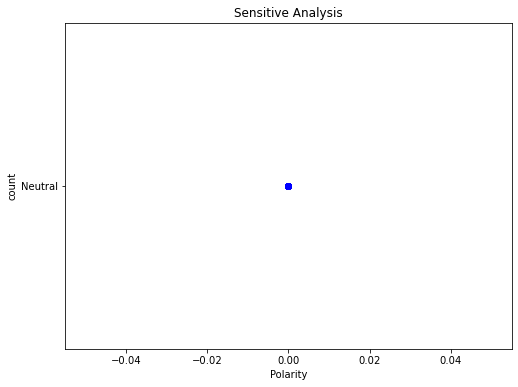

In [173]:
plt.figure(figsize=(8,6))
for i in range(0,df_sort.shape[0]):
    plt.scatter(df['possibly_sensitive'][i],df['Analysis'][i], color='Blue')
plt.title('Sensitive Analysis')
plt.xlabel('Polarity')
plt.ylabel('count')
plt.show()

In [204]:
# import pytz
# sdate=datetime.now(pytz.timezone("Australia/Sydney")).date()+timedelta(days=-2)
# edate=datetime.now(pytz.timezone("Australia/Sydney")).date()

# date_list=[sdate+timedelta(days=x) for x in range((edate-sdate).days+1)]

# df_list=[]

# for ingest_day in date_list:
#     investigating_Day=datetime.strftime(ingest_day,"%Y-%m-%d")
#     file_received={
#         'time_created':df['created_at'],
#         'day':df['created_at'].dt.day,
#         'hour':df['created_at'].dt.hour,
#         'investing_day':investigating_Day
#           } 
    
#     df_list.append(pd.DataFrame(file_received))
# df_ls=pd.concat(df_list)


In [205]:
#file['from_hour']=df_ls.apply(lambda x: datetime.strptime(x[day]+x[hour],"%Y-%m-%d"),axis=1)